<a href="https://colab.research.google.com/github/tomfaulkenberry/courses/blob/master/summer2019/mathpsychREU/lecture6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# lecture 6 -- modeling RT distributions

import numpy as np
import pandas as pd

In [0]:
dat = pd.read_csv('https://raw.githubusercontent.com/tomfaulkenberry/courses/master/summer2019/mathpsychREU/schwarz-A.csv')

dat.head()
dat.shape

(2000, 3)

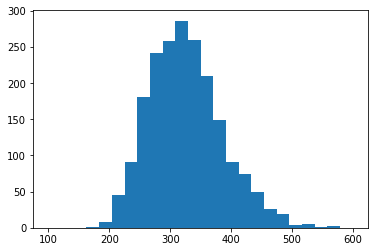

In [0]:
# plot histogram of RTs
import matplotlib.pyplot as plt

plt.hist(dat.RT, bins=np.linspace(100,600,25))
plt.show()

In [0]:
# what if we just model with normal curve?
# first, lets define normal density

def normPDF(t, mu, sigma):
  return(1/(sigma*np.sqrt(2*np.pi))*np.exp(-1*(t-mu)**2/(2*sigma**2)))




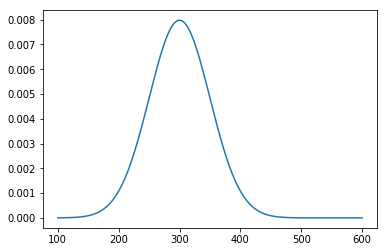

In [0]:
# plot normal density

T = np.linspace(100, 600, 200)
plt.plot(T, normPDF(T, mu=300, sigma=50))
plt.show()

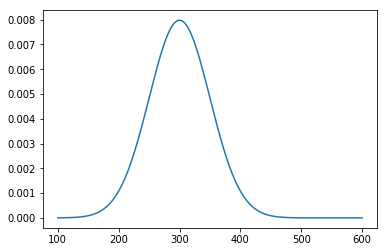

In [0]:
# we can also just use the "norm" function
# from scipy.stats

from scipy.stats import norm

plt.plot(T, norm.pdf(T, loc=300, scale=50))
plt.show()

In [0]:
# construct NLL for normal

X = dat.RT

def nllNormal(pars):
  mu, sigma = pars
  ll = np.log(norm.pdf(X, loc=mu, scale=sigma))
  return(-1*np.sum(ll))

In [0]:
# minimize log likelihood

from scipy.optimize import minimize

mu_init = X.mean()
sigma_init = X.std()

inits = np.array([mu_init, sigma_init])

mle = minimize(fun = nllNormal,
              x0 = inits,
              method = 'nelder-mead')

print(mle)

 final_simplex: (array([[325.7315313 ,  59.83738598],
       [325.73146063,  59.83741368],
       [325.73151605,  59.83747224]]), array([11021.1388248, 11021.1388248, 11021.1388248]))
           fun: 11021.138824797794
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 38
        status: 0
       success: True
             x: array([325.7315313 ,  59.83738598])


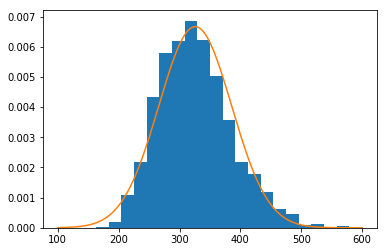

In [0]:
plt.hist(X, bins=np.linspace(100,600,25), density=True)

# extract fit and plot it as well
mu, sigma = mle.x

plt.plot(T, norm.pdf(T, loc=mu, scale=sigma))

plt.show()

In [0]:
# note: this misses the mark in several places
# there's got to be a better way!